In [1]:
print('Prajwal raj')

Prajwal raj


In [2]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [7]:
# just to use in the last of this notebook
movie = pd.read_csv('./movielens/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating= pd.read_csv('./movielens/ratings.csv')

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [8]:
print(rating.shape)
print()
print(rating.size)

(20000263, 4)

80001052


In [10]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
rating.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [11]:
rating.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [19]:
rating.columns.tolist()

['userId', 'movieId', 'rating', 'timestamp']

In [21]:
#couting the number of values present in each columns
for l in rating.columns.tolist():
    print(rating[l].value_counts())

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
59390       20
23558       20
34668       20
80291       20
58028       20
Name: userId, Length: 138493, dtype: int64
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
123607        1
90823         1
123609        1
123613        1
131136        1
Name: movieId, Length: 26744, dtype: int64
4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64
825638400     643
1267135219    207
1122405887    106
1111509409     68
1111475159     47
             ... 
944964066       1
1361162471      1
1379872518      1
1220493060      1
1277058215      1
Name: timestamp, Length: 15351121, dtype: int64


In [22]:
rating.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,20000263.0,6.904587e+04,4.003863e+04,1.0,34395.0,6.914100e+04,1.036370e+05,1.384930e+05
movieId,20000263.0,9.041567e+03,1.978948e+04,1.0,902.0,2.167000e+03,4.770000e+03,1.312620e+05
rating,20000263.0,3.525529e+00,1.051989e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,20000263.0,1.100918e+09,1.621694e+08,789652004.0,966797745.0,1.103556e+09,1.225642e+09,1.427784e+09


In [23]:
#Now going with individual  Features
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [24]:
rating['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [29]:
rating['rating'].mean()

3.5255285642993797

In [30]:
rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [31]:
rating.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [32]:
r = rating['rating']>4
r.sum()

4433484

In [33]:
rating.shape

(20000263, 4)

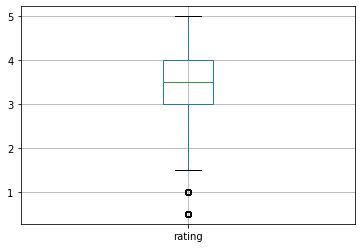

In [35]:
%matplotlib inline


rating.boxplot('rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A014C46288>]],
      dtype=object)

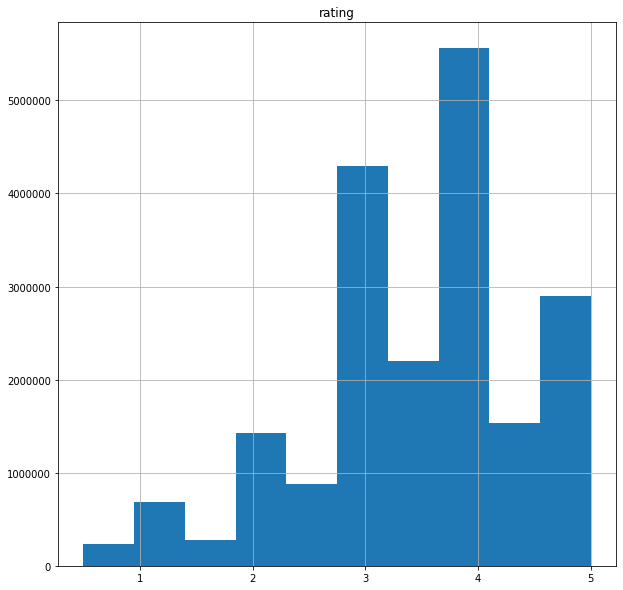

In [37]:
rating.hist(column = 'rating', figsize=(10,10))

# Groupby and Aggregate Functions

In [38]:
avg_rating = rating[['movieId','rating']].groupby('movieId').mean()

In [39]:
avg_rating[5:15]

,rating
movieId,
6,3.834930
7,3.366484
8,3.142049
9,3.004924
10,3.430029
11,3.667713
12,2.619766
13,3.272416
14,3.432082


In [40]:
rating_counts = rating[['movieId','rating']].groupby('rating').count()

In [41]:
rating_counts

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [42]:
rating.head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [59]:
r =rating['movieId'].value_counts().to_frame()

In [60]:
r.head()

,movieId
296,67310
356,66172
318,63366
593,63299
480,59715


In [61]:
r.shape

(26744, 1)

In [62]:
r.columns

Index(['movieId'], dtype='object')

In [68]:
u = rating['movieId'].unique()

In [69]:
u

array([     2,     29,     32, ..., 121021, 110167, 110510], dtype=int64)

In [70]:
u.size

26744

In [71]:
u.shape

(26744,)

In [49]:
print(rating.shape[0])

20000263


In [72]:
a = rating[['movieId','rating']].groupby('movieId').count()

In [73]:
a

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [75]:
rating['movieId'].iloc[1]

29

In [84]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [83]:
# how can we know the value of movieId in the 3rd row
#df["<ColumnsName"].iloc[n-1]
rating['movieId'].iloc[2]

32

In [82]:
l=0
if rating['movieId']==1:
    l= l+1
    print(l)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [81]:
while rating['movieId']==1:
    l = l+1
    print(l)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().